## Primer cuaderno
En este cuadernos exploraremos los datos del dataset iris y usaremos un modelo logístico para clasificar las flores en tres categorías

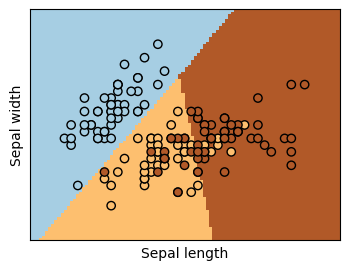

In [1]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)
logreg.fit(X, Y)

_, ax = plt.subplots(figsize=(4, 3))
DecisionBoundaryDisplay.from_estimator(
    logreg,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="Sepal length",
    ylabel="Sepal width",
    eps=0.5,
)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)


plt.xticks(())
plt.yticks(())

plt.show()

In [5]:
import pandas as pd
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
y= iris.target
y_df = pd.Series(y,name='species')
y_df

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

In [8]:
total_df = pd.concat([iris_df,y_df],axis=1)
total_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


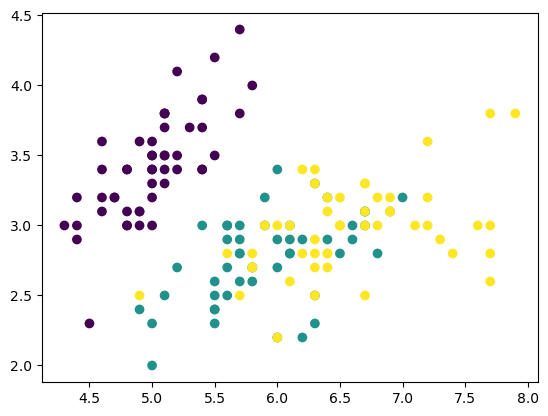

In [10]:
plt.scatter(total_df['sepal length (cm)'],total_df['sepal width (cm)'],c=total_df['species'])
plt.show()

In [12]:
# Modelamiento
modelo_log = LogisticRegression(random_state=42,max_iter=1000)
modelo_log

LogisticRegression(max_iter=1000, random_state=42)

In [13]:
modelo_log.fit(iris_df, y_df)

LogisticRegression(max_iter=1000, random_state=42)

In [15]:
modelo_log.coef_

array([[-0.42340889,  0.96722201, -2.51717294, -1.07951336],
       [ 0.53440819, -0.32161354, -0.20651822, -0.94415957],
       [-0.1109993 , -0.64560846,  2.72369116,  2.02367293]])

In [16]:
iris_df.loc[78]

sepal length (cm)    6.0
sepal width (cm)     2.9
petal length (cm)    4.5
petal width (cm)     1.5
Name: 78, dtype: float64

In [17]:
modelo_log.predict([[6,3,4,1.3]])

c:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])